In [9]:
import sys
# Import NDVM modules to load pickled data
sys.path.append('/home/dosoukup/Dataset/NDVM/ndvm/modules')
sys.path.append('/home/dosoukup/Dataset/NDVM/ndvm/')
import os
import pickle
import metric1, metric2, metric3
import json
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd

In [10]:
REPORT_NAME = "metrics/report-dataset-1759392366"

# General Report 

In [3]:
with open(REPORT_NAME+'.csv', 'r') as file:
    basic = json.load(file)
pprint(basic)

{'Analyzed Samples': {'0': 50,
                      '1': 28,
                      '10': 122,
                      '100': 8255,
                      '11': 434,
                      '12': 458,
                      '13': 1685,
                      '14': 2363,
                      '15': 403,
                      '16': 29,
                      '17': 5419,
                      '18': 161,
                      '19': 4519,
                      '2': 17,
                      '20': 179,
                      '21': 100,
                      '22': 327,
                      '23': 13,
                      '24': 52,
                      '25': 86,
                      '26': 2486,
                      '27': 795,
                      '28': 7125,
                      '29': 7210,
                      '3': 440,
                      '30': 1147,
                      '31': 581,
                      '32': 6051,
                      '33': 342,
                      '34': 15,
           

# Metric 1

In [11]:
with open(REPORT_NAME+"-metric1/metric1.obj", "rb") as f:
    metric1 = pickle.load(f)

In [12]:
metric1.ds_redundancy

0.2421875

In [13]:
data = metric1.redundancy_metadata

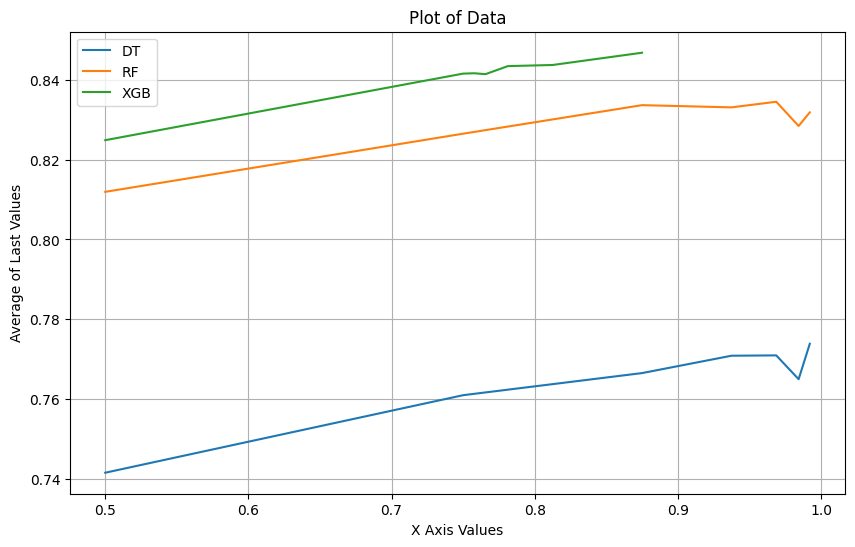

In [14]:
plt.figure(figsize=(10, 6))

for item in data:
    for name, values in item.items():
        x_values = sorted(values.keys())
        y_values = []
        for x in x_values:
            # Calculate the average of the last values (assuming each list has 5 values)
            avg_y = np.mean([v[0] for v in values[x]])
            y_values.append(avg_y)
        plt.plot(x_values, y_values, label=name)

plt.xlabel("X Axis Values")
plt.ylabel("Average of Last Values")
plt.title("Plot of Data")
plt.legend()
plt.grid(True)
plt.show()

# Metric 2

In [15]:
with open(REPORT_NAME+"-metric2/metric2.obj", "rb") as f:
#with open("/home/dosoukup/Dataset/drift-katoda-v2/metrics/report-dataset-1742681397-metric2/perqoda.obj", "rb") as f:
    metric2 = pickle.load(f)

In [16]:
metric2.raw_slope

[1.526795230311838, 'RF']

In [17]:
metric2.print_results()

##### Results #####
P-value table
           50        30        10        1 
DT   0.009901  0.009901  0.009901  0.009901
RF   0.009901  0.009901  0.009901  0.009901
XGB  0.009901  0.009901  0.009901  0.009901
DT = 1.3964127137225306
RF = 1.526795230311838
XGB = 1.5242047575779538
Max Slope
Slope: 1.526795230311838 - RF
AUC: 0.24664913624508755 - XGB
Top AUC 0.24827551515570645 - Max F1: 0.8132164975149339 - Final Metric: 0.7787974498087595


In [18]:
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))

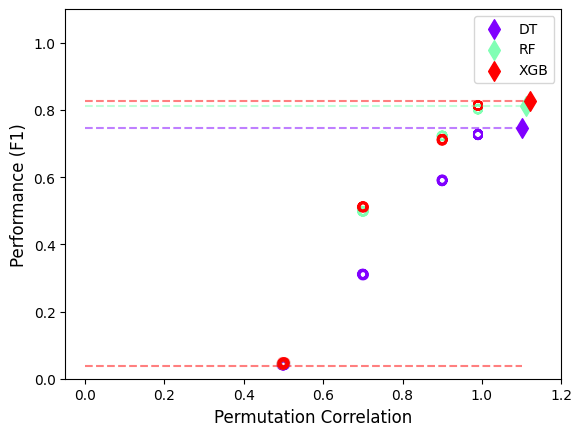

,50,30,10,1
DT,0.009901,0.009901,0.009901,0.009901
RF,0.009901,0.009901,0.009901,0.009901
XGB,0.009901,0.009901,0.009901,0.009901


In [19]:
pvalues = np.zeros((metric2.a[1],len(metric2.perc)))
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))

# plot true values as diamonds
for i, c in zip(range(metric2.a[1]),colors):
    plt.scatter(1.1+i*0.01, metric2.ev.scores.mean(axis=2)[:, i, 0], s=100, color=c, marker='d')
    
plt.legend((metric2.clfs))

# plot lines for true values
for i, c in zip(range(metric2.a[1]),colors):
    plt.plot([0, 1.1+i*0.01], [metric2.ev.scores.mean(axis=2)[:, i, 0], metric2.ev.scores.mean(axis=2)[:, i, 0]], c=c, linestyle='dashed', alpha=0.5)

# plot permutations
colors = cm.rainbow(np.linspace(0, 1, metric2.a[1]))
for j in range(len(metric2.perc)):
    for i, c in zip(range(metric2.a[1]),colors):
        ind = np.where(metric2.perm[:,j,i]<metric2.ev.scores.mean(axis=2)[:, i, 0])
        plt.scatter((metric2.corr[ind,j]), metric2.perm[ind,j,i], color="none", edgecolor=c, alpha=0.3)
        
for j in range(len(metric2.perc)):
    for i, c in zip(range(metric2.a[1]),colors):
        ind = np.where(metric2.perm[:,j,i]>=metric2.ev.scores.mean(axis=2)[:, i, 0])
        plt.scatter((metric2.corr[ind,j]), metric2.perm[ind,j,i], color=c, edgecolor="black", alpha=1)
        pvalues[i,j] = ((len(ind[0])+1)*1.0)/(metric2.nperm+1);

plt.ylabel('Performance (F1)', size=12)
plt.xlabel('Permutation Correlation', size=12)       

plt.plot([0, 1.1], [metric2.perm.min(), metric2.perm.min()], color='red', linestyle='dashed', alpha=0.5)

plt.axis([-0.05, 1.2, 0, 1.1])

plt.show()

pv = pd.DataFrame(data=pvalues, index=metric2.clfs, columns=metric2.perc)

def significant(v):
    return "font-weight: bold; color: red" if v > 0.01 else None

pv.style.applymap(significant)

DT = 1.3964127137225306
RF = 1.526795230311838
XGB = 1.5242047575779538
Slope: 1.526795230311838 - RF
AUC: 0.24664913624508755 - XGB


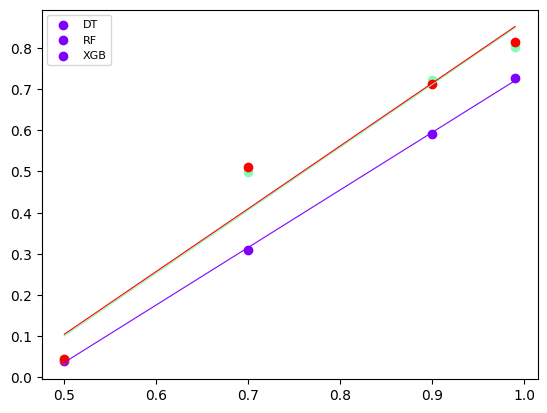

In [20]:
names = metric2.clfs
cor = []
per = []
slopes = []
auc_scores = []

for i, c in zip(range(metric2.a[1]),colors):
    for j in range(len(metric2.perc)):
        plt.scatter(np.mean(metric2.corr[:,j]), np.mean(metric2.perm[:,j,i]), color=c, alpha=1)
    
    cor = np.mean(metric2.corr[:,:], axis=0)
    per = np.mean(metric2.perm[:,:,i], axis=0)
    
    auc_score = auc(cor,per)
    slope, intercept = np.polyfit(cor, per, 1)
    plt.plot(cor, slope*cor + intercept, color=c, linewidth=0.8)
    print(names[i], '=', slope)
    slopes = np.append(slopes, slope)
    auc_scores = np.append(auc_scores, auc_score)

plt.legend(names, prop={'size': 8})

maxind = np.argmax(abs(slopes))
maxind_auc = np.argmax(abs(auc_scores))

print('Slope:', np.max(abs(slopes)), '-', names[maxind])
print('AUC:', np.max(abs(auc_scores)), '-', names[maxind_auc])

# Metric 3

In [21]:
with open(REPORT_NAME+"-metric3/metric3.obj", "rb") as f:
    metric3 = pickle.load(f)

In [22]:
# The base key
next(iter(basic["Similarity"]["detail"]))

'14'

In [23]:
# All keys
basic["Similarity"]["detail"].keys()

dict_keys(['14', '29', '100', '66', '28', '41', '43', '62', '59', '50', '32', '55', '61', '49', '13', '89', '47', '42', '91', '45', '44', '17', '57', '99', '30', '75', '78', '12', '19', '18', '97', '48', '5', '15', '36', '80', '60', '77', '20', '79', '76', '3', '68', '82', '93', '35', '70', '52', '39', '56', '98', '65', '92', '11', '26', '38', '58', '33', '64', '21', '54', '8', '88', '22', '53', '27', '67', '37', '51', '96', '4', '63', '31', '72', '81', '87', '10', '90', '46', '84', '25', '94', '7', '1', '73', '16', '83', '24', '40', '2', '9', '69', '74', '86', '85', '34', '23', '95', '0', '71', '6'])

In [24]:
# All metric 3 metadata
basic["Similarity"]["detail"]

{'14': {'l1_loss': 0.09983031451702118, 'relative_loss': 1.8495269688099503},
 '29': {'l1_loss': 0.10398712754249573, 'relative_loss': 1.9265390250386705},
 '100': {'l1_loss': 0.07916757464408875, 'relative_loss': 1.4667144450852323},
 '66': {'l1_loss': 0.12426523864269257, 'relative_loss': 2.3022256442563616},
 '28': {'l1_loss': 0.12387123703956604, 'relative_loss': 2.2949260920686076},
 '41': {'l1_loss': 0.0674460306763649, 'relative_loss': 1.2495528365169202},
 '43': {'l1_loss': 0.05640183016657829, 'relative_loss': 1.0449401716102882},
 '62': {'l1_loss': 0.05397613346576691, 'relative_loss': 1.0},
 '59': {'l1_loss': 0.05862322077155113, 'relative_loss': 1.0860952240814272},
 '50': {'l1_loss': 0.05027434974908829, 'relative_loss': 0.9314181383698706},
 '32': {'l1_loss': 0.10537716746330261, 'relative_loss': 1.952291887119621},
 '55': {'l1_loss': 0.07861631363630295, 'relative_loss': 1.456501394012661},
 '61': {'l1_loss': 0.07415767759084702, 'relative_loss': 1.3738975511812046},
 '4